In [114]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.optimizers import Adam



In [115]:
aita = pd.read_csv('filteredAITA.csv')

In [116]:
# balancing the dataset by dropping around 50,000 NTA rows
aita = aita.sort_values('verdict', ascending= False)
# sliced_aita=aita[aita['verdict'] == 'NTA'].head(20000)
aita = aita[:41003]
aita.drop('Unnamed: 0', axis=1, inplace=True)
aita

,body,verdict
45453,"I think I probably ATA, but Im curious to see ...",YTA
65733,Background info:\nI live in a 2 story house wi...,YTA
17885,I borrowed my wife's fancy DSLR Camera for a t...,YTA
17884,Okay hear me out here I know this is weird. Ok...,YTA
65723,"My roommate Lara (20F) has a brother, Leon (18...",YTA
...,...,...
58754,"So, I have this co-worker who is very nice of ...",NTA
58759,Recently a really big thing in my (16F) life c...,NTA
58761,I am moving out of my apartment and renting a ...,NTA
58801,Last night a friend came over for dinner. I ha...,NTA


In [117]:
numY = 0
numN = 0
for index, row in aita.iterrows():
    if row['verdict'] == 'YTA':
        numY += 1
    else:
        numN += 1
print(numY, numN)
print(numY + numN)

20648 20355
41003


(0.0, 1000.0)

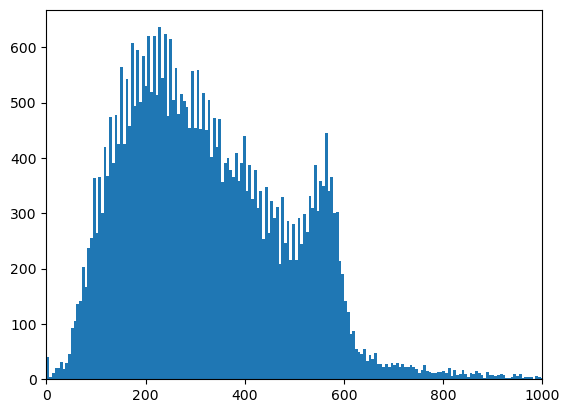

In [118]:
aita
lens = []
for body in aita['body'].dropna():
    lens.append(len(body.split()))
plt.hist(lens, bins=1000)
plt.xlim([0,1000])

In [119]:
allWords = []
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
for index, row in aita.iterrows():
    words = str(row["body"]).split()
    allWords.append(words)
    
    

tokenizer.fit_on_texts(allWords)
sequences = tokenizer.texts_to_sequences(allWords)

# pad the sequences to ensure that they are all of the same length.
padded_sequences = pad_sequences(sequences, maxlen=100)

# convert the labels to numerical values (0 for NTA and 1 for YTA).
labels = pd.get_dummies(aita['verdict'], drop_first=True)
print(len(padded_sequences), len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

41003 41003


In [120]:
# build the model with more epochs
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)


Epoch 1/20
513/513 [==============================] - 74s 107ms/step - loss: 0.6846 - accuracy: 0.5526 - val_loss: 0.6787 - val_accuracy: 0.5652
Epoch 2/20
513/513 [==============================] - 50s 98ms/step - loss: 0.6507 - accuracy: 0.6240 - val_loss: 0.6841 - val_accuracy: 0.5691
Epoch 3/20
513/513 [==============================] - 51s 100ms/step - loss: 0.6147 - accuracy: 0.6652 - val_loss: 0.7128 - val_accuracy: 0.5679
Epoch 4/20
513/513 [==============================] - 52s 100ms/step - loss: 0.5733 - accuracy: 0.6998 - val_loss: 0.7492 - val_accuracy: 0.5568
Epoch 5/20
513/513 [==============================] - 48s 94ms/step - loss: 0.5338 - accuracy: 0.7320 - val_loss: 0.7692 - val_accuracy: 0.5516
Epoch 6/20
513/513 [==============================] - 48s 93ms/step - loss: 0.4970 - accuracy: 0.7566 - val_loss: 0.8179 - val_accuracy: 0.5504
Epoch 7/20
513/513 [==============================] - 51s 100ms/step - loss: 0.4561 - accuracy: 0.7824 - val_loss: 0.9486 - val_accur

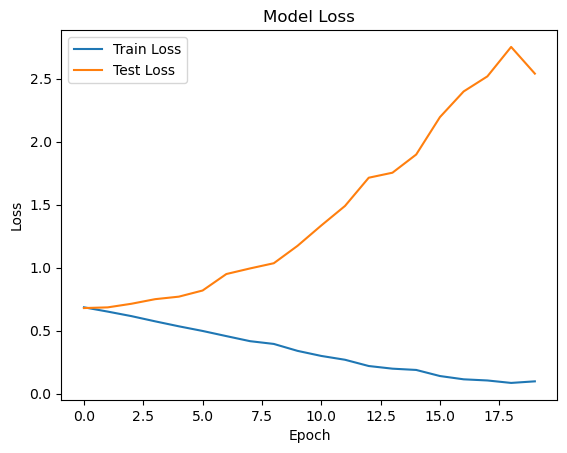

In [121]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
plt.savefig('Big01first.png', bbox_inches='tight')
plt.show()

In [32]:
# Plan: add one dropout layer. If that works, add another, or just up the dropout value. Then we can try adding a dense layer


model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
513/513 [==============================] - 56s 99ms/step - loss: 0.6875 - accuracy: 0.5401 - val_loss: 0.6894 - val_accuracy: 0.5446
Epoch 2/10
513/513 [==============================] - 51s 100ms/step - loss: 0.6587 - accuracy: 0.6105 - val_loss: 0.6799 - val_accuracy: 0.5835
Epoch 3/10
513/513 [==============================] - 46s 90ms/step - loss: 0.6292 - accuracy: 0.6465 - val_loss: 0.6869 - val_accuracy: 0.5619
Epoch 4/10
513/513 [==============================] - 45s 87ms/step - loss: 0.6080 - accuracy: 0.6697 - val_loss: 0.6970 - val_accuracy: 0.5779
Epoch 5/10
513/513 [==============================] - 45s 88ms/step - loss: 0.5901 - accuracy: 0.6865 - val_loss: 0.7169 - val_accuracy: 0.5662
Epoch 6/10
513/513 [==============================] - 49s 95ms/step - loss: 0.5694 - accuracy: 0.7021 - val_loss: 0.7468 - val_accuracy: 0.5692
Epoch 7/10
513/513 [==============================] - 49s 96ms/step - loss: 0.5488 - accuracy: 0.7232 - val_loss: 0.7464 - val_accuracy

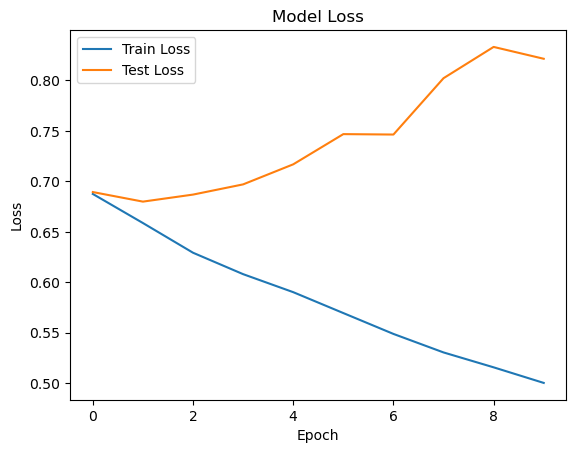

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.savefig('firstModelPerformance.png', bbox_inches='tight')
plt.show()

In [34]:
# adding another layer of dropout

model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
513/513 [==============================] - 54s 102ms/step - loss: 0.6874 - accuracy: 0.5387 - val_loss: 0.6779 - val_accuracy: 0.5676
Epoch 2/10
513/513 [==============================] - 54s 105ms/step - loss: 0.6614 - accuracy: 0.6045 - val_loss: 0.6795 - val_accuracy: 0.5793
Epoch 3/10
513/513 [==============================] - 52s 101ms/step - loss: 0.6337 - accuracy: 0.6436 - val_loss: 0.6893 - val_accuracy: 0.5707
Epoch 4/10
513/513 [==============================] - 51s 99ms/step - loss: 0.6089 - accuracy: 0.6706 - val_loss: 0.7101 - val_accuracy: 0.5692
Epoch 5/10
513/513 [==============================] - 47s 91ms/step - loss: 0.5829 - accuracy: 0.6945 - val_loss: 0.7217 - val_accuracy: 0.5642
Epoch 6/10
513/513 [==============================] - 54s 105ms/step - loss: 0.5620 - accuracy: 0.7122 - val_loss: 0.7426 - val_accuracy: 0.5696
Epoch 7/10
513/513 [==============================] - 51s 99ms/step - loss: 0.5421 - accuracy: 0.7263 - val_loss: 0.7748 - val_accur

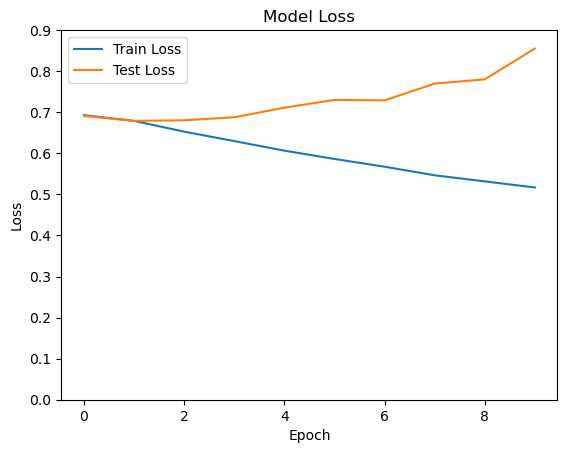

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 0.9])
plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.savefig('firstModelPerformance.png', bbox_inches='tight')
plt.show()

In [36]:
# adding another Dense layer and a dropoutlayer. 

model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
513/513 [==============================] - 51s 96ms/step - loss: 0.6930 - accuracy: 0.5109 - val_loss: 0.6911 - val_accuracy: 0.5346
Epoch 2/10
513/513 [==============================] - 53s 102ms/step - loss: 0.6789 - accuracy: 0.5720 - val_loss: 0.6790 - val_accuracy: 0.5675
Epoch 3/10
513/513 [==============================] - 53s 104ms/step - loss: 0.6528 - accuracy: 0.6238 - val_loss: 0.6804 - val_accuracy: 0.5748
Epoch 4/10
513/513 [==============================] - 52s 101ms/step - loss: 0.6298 - accuracy: 0.6519 - val_loss: 0.6878 - val_accuracy: 0.5646
Epoch 5/10
513/513 [==============================] - 55s 107ms/step - loss: 0.6065 - accuracy: 0.6757 - val_loss: 0.7111 - val_accuracy: 0.5659
Epoch 6/10
513/513 [==============================] - 50s 98ms/step - loss: 0.5863 - accuracy: 0.6934 - val_loss: 0.7301 - val_accuracy: 0.5720
Epoch 7/10
513/513 [==============================] - 49s 96ms/step - loss: 0.5674 - accuracy: 0.7070 - val_loss: 0.7289 - val_accur

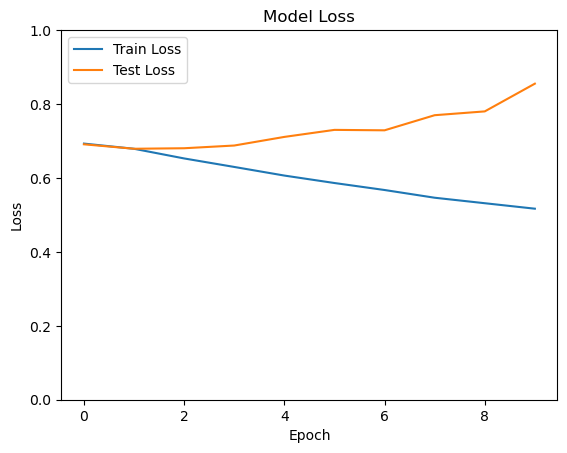

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.savefig('firstModelPerformance.png', bbox_inches='tight')
plt.show()

In [44]:
# removing one of the dropout layers
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
513/513 [==============================] - 53s 100ms/step - loss: 0.6902 - accuracy: 0.5271 - val_loss: 0.6806 - val_accuracy: 0.5758
Epoch 2/10
513/513 [==============================] - 55s 107ms/step - loss: 0.6668 - accuracy: 0.5978 - val_loss: 0.6853 - val_accuracy: 0.5635
Epoch 3/10
513/513 [==============================] - 55s 106ms/step - loss: 0.6407 - accuracy: 0.6366 - val_loss: 0.6834 - val_accuracy: 0.5666
Epoch 4/10
513/513 [==============================] - 55s 106ms/step - loss: 0.6202 - accuracy: 0.6625 - val_loss: 0.7105 - val_accuracy: 0.5704
Epoch 5/10
513/513 [==============================] - 53s 103ms/step - loss: 0.5983 - accuracy: 0.6856 - val_loss: 0.7067 - val_accuracy: 0.5658
Epoch 6/10
513/513 [==============================] - 59s 115ms/step - loss: 0.5781 - accuracy: 0.6977 - val_loss: 0.7225 - val_accuracy: 0.5593
Epoch 7/10
513/513 [==============================] - 57s 111ms/step - loss: 0.5584 - accuracy: 0.7156 - val_loss: 0.7372 - val_ac

KeyboardInterrupt: 

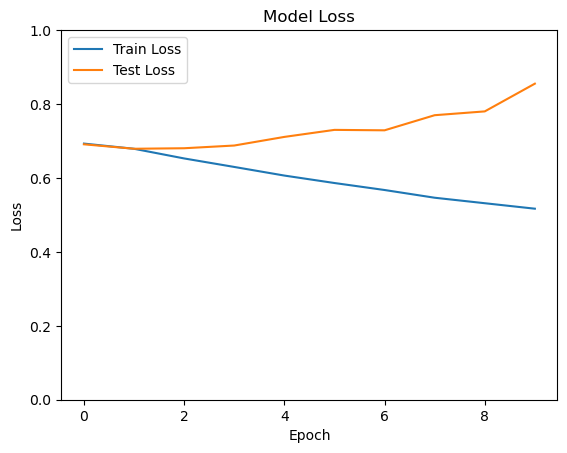

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.savefig('firstModelPerformance.png', bbox_inches='tight')
plt.show()

In [58]:

# Plan: try changing the input length

allWords = []
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
for index, row in aita.iterrows():
    words = str(row["body"]).split()
    allWords.append(words)
    
    

tokenizer.fit_on_texts(allWords)
sequences = tokenizer.texts_to_sequences(allWords)

# pad the sequences to ensure that they are all of the same length.
padded_sequences = pad_sequences(sequences, maxlen=300)

# convert the labels to numerical values (0 for NTA and 1 for YTA).
labels = pd.get_dummies(aita['verdict'], drop_first=True)
print(len(padded_sequences), len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)



model = Sequential()
model.add(Embedding(5000, 64, input_length=300))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

41003 41003
Epoch 1/10
513/513 [==============================] - 151s 291ms/step - loss: 0.6922 - accuracy: 0.5203 - val_loss: 0.6874 - val_accuracy: 0.5427
Epoch 2/10
513/513 [==============================] - 87s 170ms/step - loss: 0.6802 - accuracy: 0.5690 - val_loss: 0.6823 - val_accuracy: 0.5709
Epoch 3/10
513/513 [==============================] - 75s 146ms/step - loss: 0.6566 - accuracy: 0.6122 - val_loss: 0.6847 - val_accuracy: 0.5732
Epoch 4/10
513/513 [==============================] - 73s 142ms/step - loss: 0.6308 - accuracy: 0.6470 - val_loss: 0.6862 - val_accuracy: 0.5853
Epoch 5/10
513/513 [==============================] - 76s 148ms/step - loss: 0.6063 - accuracy: 0.6746 - val_loss: 0.7053 - val_accuracy: 0.5686
Epoch 6/10
513/513 [==============================] - 80s 155ms/step - loss: 0.5856 - accuracy: 0.6935 - val_loss: 0.7210 - val_accuracy: 0.5701
Epoch 7/10
513/513 [==============================] - 75s 146ms/step - loss: 0.5619 - accuracy: 0.7089 - val_loss: 0.

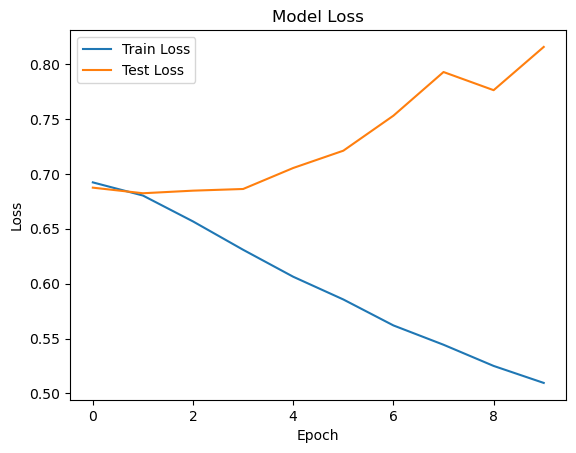

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.ylim([0, 1])
plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.savefig('firstModelPerformance.png', bbox_inches='tight')
plt.show()

In [61]:
# plan: change the learning rate, and then also epochs
model = Sequential()
model.add(Embedding(5000, 64, input_length=300))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
513/513 [==============================] - 136s 261ms/step - loss: 0.6923 - accuracy: 0.5178 - val_loss: 0.6830 - val_accuracy: 0.5679
Epoch 2/30
513/513 [==============================] - 124s 242ms/step - loss: 0.6803 - accuracy: 0.5649 - val_loss: 0.6920 - val_accuracy: 0.5115
Epoch 3/30
513/513 [==============================] - 128s 250ms/step - loss: 0.6693 - accuracy: 0.5900 - val_loss: 0.6791 - val_accuracy: 0.5780
Epoch 4/30
513/513 [==============================] - 119s 231ms/step - loss: 0.6421 - accuracy: 0.6364 - val_loss: 0.6840 - val_accuracy: 0.5758
Epoch 5/30
513/513 [==============================] - 116s 227ms/step - loss: 0.6223 - accuracy: 0.6575 - val_loss: 0.6860 - val_accuracy: 0.5659
Epoch 6/30
513/513 [==============================] - 116s 226ms/step - loss: 0.6069 - accuracy: 0.6726 - val_loss: 0.7065 - val_accuracy: 0.5790
Epoch 7/30
513/513 [==============================] - 114s 223ms/step - loss: 0.5849 - accuracy: 0.6929 - val_loss: 0.7278 -

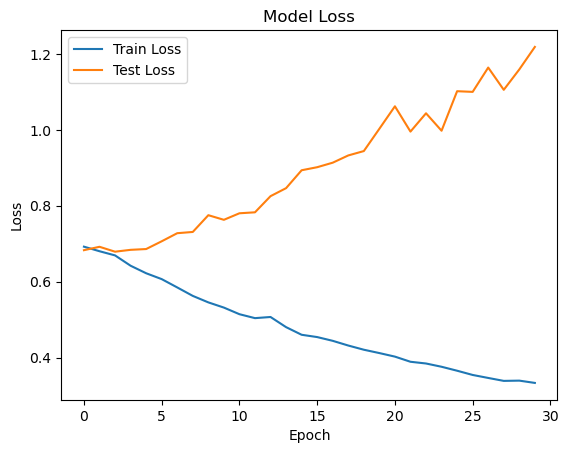

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.ylim([0, 1])
plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.savefig('firstModelPerformance.png', bbox_inches='tight')
plt.show()

try making the window length smaller. Also, should only train on the posts of 300 words or less, rather than on all posts and just cutting them if they're longer. Doing that might cut off the good part of the story. 

training on posts of 300 words or less

In [92]:
for index, row in aita.iterrows():
#     print( len(row['body'].split()))
    if isinstance(row['body'], str) and len(row['body'].split()) > 300:
        aita = aita.drop(index)
#         print('jere')
aita

,body,verdict
1772,Hey I'm a 17 year old black guy who is a ugly...,YTA
77672,"My brother has two kids, Gemma (13) and Jordan...",YTA
44501,My wife and I have been married for almost 20 ...,YTA
8604,I purchased concert tickets off of Craigslist ...,YTA
72534,I posted an ad on Craigslist to have someone c...,YTA
...,...,...
18550,My friend bought us tickets for a concert. I w...,NTA
18424,So we were together for 1 year and knew each o...,NTA
20006,I was on facebook browsing our city's group w...,NTA
18689,Ok. She does take showers but for once of ever...,NTA


In [93]:
allWords = []
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
for index, row in aita.iterrows():
    words = str(row["body"]).split()
    allWords.append(words)
    
    

tokenizer.fit_on_texts(allWords)
sequences = tokenizer.texts_to_sequences(allWords)

# pad the sequences to ensure that they are all of the same length.
padded_sequences = pad_sequences(sequences, maxlen=300)

# convert the labels to numerical values (0 for NTA and 1 for YTA).
labels = pd.get_dummies(aita['verdict'], drop_first=True)
print(len(padded_sequences), len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


20287 20287


In [94]:
model = Sequential()
model.add(Embedding(5000, 64, input_length=300))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
254/254 [==============================] - 34s 129ms/step - loss: 0.6887 - accuracy: 0.5456 - val_loss: 0.6843 - val_accuracy: 0.5498
Epoch 2/10
254/254 [==============================] - 33s 129ms/step - loss: 0.6706 - accuracy: 0.5877 - val_loss: 0.6765 - val_accuracy: 0.5779
Epoch 3/10
254/254 [==============================] - 33s 129ms/step - loss: 0.6268 - accuracy: 0.6541 - val_loss: 0.6960 - val_accuracy: 0.5614
Epoch 4/10
254/254 [==============================] - 33s 129ms/step - loss: 0.5844 - accuracy: 0.6911 - val_loss: 0.7120 - val_accuracy: 0.5626
Epoch 5/10
254/254 [==============================] - 33s 129ms/step - loss: 0.5430 - accuracy: 0.7281 - val_loss: 0.7804 - val_accuracy: 0.5483
Epoch 6/10
254/254 [==============================] - 33s 129ms/step - loss: 0.5064 - accuracy: 0.7529 - val_loss: 0.7850 - val_accuracy: 0.5446
Epoch 7/10
254/254 [==============================] - 32s 128ms/step - loss: 0.4726 - accuracy: 0.7780 - val_loss: 0.8093 - val_ac

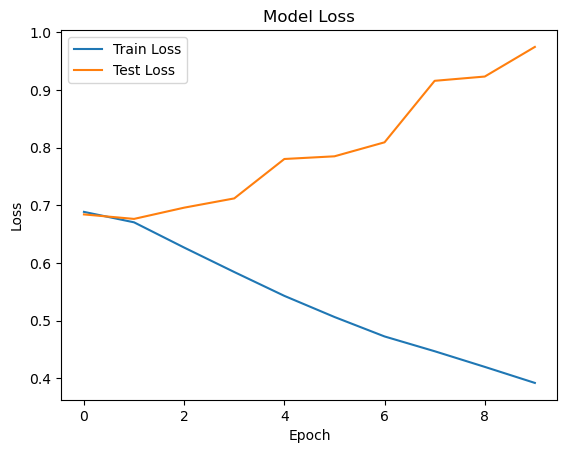

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.ylim([0, 1])
plt.legend(['Train Loss','Test Loss'], loc='upper left')
# plt.savefig('firstModelPerformance.png', bbox_inches='tight')
plt.show()

trying to train on post of 100 words or less

In [108]:
for index, row in aita.iterrows():
    if isinstance(row['body'], str) and len(row['body'].split()) > 100:
        aita = aita.drop(index)
aita

,body,verdict
77693,"15M, family has a hard time due to some medica...",YTA
77694,The atmosphere for men now a days is so scary ...,YTA
1774,I recently made a meme that blew up on reddit....,YTA
72515,When I was in 5th grade in 2016 when bottle fl...,YTA
1762,So my sister is 14 turning 15 this week. So co...,YTA
...,...,...
18693,"I lent a friend money a few months ago, with h...",NTA
19966,NaN,NTA
19997,I was walking down a crosswalk when some guy d...,NTA
18681,By no means is my toddler drinking a meaningfu...,NTA


In [109]:
allWords = []
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
for index, row in aita.iterrows():
    words = str(row["body"]).split()
    allWords.append(words)
    
    

tokenizer.fit_on_texts(allWords)
sequences = tokenizer.texts_to_sequences(allWords)

# pad the sequences to ensure that they are all of the same length.
padded_sequences = pad_sequences(sequences, maxlen=100)

# convert the labels to numerical values (0 for NTA and 1 for YTA).
labels = pd.get_dummies(aita['verdict'], drop_first=True)
print(len(padded_sequences), len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


2048 2048


In [110]:
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
26/26 [==============================] - 3s 56ms/step - loss: 0.6856 - accuracy: 0.5678 - val_loss: 0.6731 - val_accuracy: 0.6000
Epoch 2/10
26/26 [==============================] - 1s 46ms/step - loss: 0.6744 - accuracy: 0.5958 - val_loss: 0.6726 - val_accuracy: 0.6000
Epoch 3/10
26/26 [==============================] - 1s 46ms/step - loss: 0.6643 - accuracy: 0.5958 - val_loss: 0.6719 - val_accuracy: 0.6000
Epoch 4/10
26/26 [==============================] - 1s 46ms/step - loss: 0.5987 - accuracy: 0.6661 - val_loss: 0.7220 - val_accuracy: 0.5878
Epoch 5/10
26/26 [==============================] - 1s 47ms/step - loss: 0.4654 - accuracy: 0.7857 - val_loss: 0.7973 - val_accuracy: 0.5341
Epoch 6/10
26/26 [==============================] - 1s 46ms/step - loss: 0.3067 - accuracy: 0.8712 - val_loss: 0.9763 - val_accuracy: 0.5659
Epoch 7/10
26/26 [==============================] - 1s 50ms/step - loss: 0.2173 - accuracy: 0.9212 - val_loss: 1.2216 - val_accuracy: 0.5463
Epoch 8/10
26

trying to train on posts less than 700 words

In [112]:
# filtering data
text = []
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
for index, row in aita.iterrows():
    words = str(row["body"]).split()
    text.append(words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

# pad the sequences to ensure that they are all of the same length.
padded_sequences = pad_sequences(sequences, maxlen=700)

# convert the labels to numerical values (0 for NTA and 1 for YTA).
labels = pd.get_dummies(aita['verdict'], drop_first=True)
print(len(padded_sequences), len(labels))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

79003 79003


In [113]:
model = Sequential()
model.add(Embedding(5000, 64, input_length=700))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
988/988 [==============================] - 394s 395ms/step - loss: 0.5734 - accuracy: 0.7379 - val_loss: 0.5654 - val_accuracy: 0.7374
Epoch 2/10
988/988 [==============================] - 439s 444ms/step - loss: 0.5530 - accuracy: 0.7386 - val_loss: 0.5616 - val_accuracy: 0.7357
Epoch 3/10
988/988 [==============================] - 406s 411ms/step - loss: 0.5392 - accuracy: 0.7415 - val_loss: 0.5651 - val_accuracy: 0.7356
Epoch 4/10
988/988 [==============================] - 3754s 4s/step - loss: 0.5266 - accuracy: 0.7452 - val_loss: 0.5793 - val_accuracy: 0.7290
Epoch 5/10
988/988 [==============================] - 2299s 2s/step - loss: 0.5154 - accuracy: 0.7517 - val_loss: 0.5706 - val_accuracy: 0.7148
Epoch 6/10
988/988 [==============================] - 2272s 2s/step - loss: 0.5041 - accuracy: 0.7604 - val_loss: 0.5781 - val_accuracy: 0.7296
Epoch 7/10
988/988 [==============================] - 3261s 3s/step - loss: 0.4984 - accuracy: 0.7628 - val_loss: 0.5868 - val_acc